# Project 17 Flight Ticket price Prediction
--> Aim is to predict the price of Flight Ticket. 

## Lets Load the Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Lets Load the dataset

In [120]:
data=pd.read_excel("Flight_Data_Train.xlsx")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [121]:
dts=pd.read_excel('Test_set.xlsx')
dts.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [122]:
## Lets check if there are any null values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [124]:
data['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

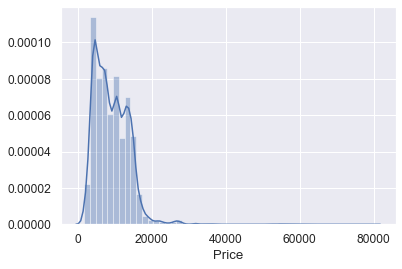

In [125]:
sns.set(style="darkgrid", palette='deep', font_scale=1.1)
sns.distplot(data['Price'])

From the above we can see that the ticket prices are higly postively skewed, so we need to treat the skweness.  

In [126]:
from scipy.stats import boxcox
data['Price']=boxcox(data['Price'],0)

## Lets do the EDA

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

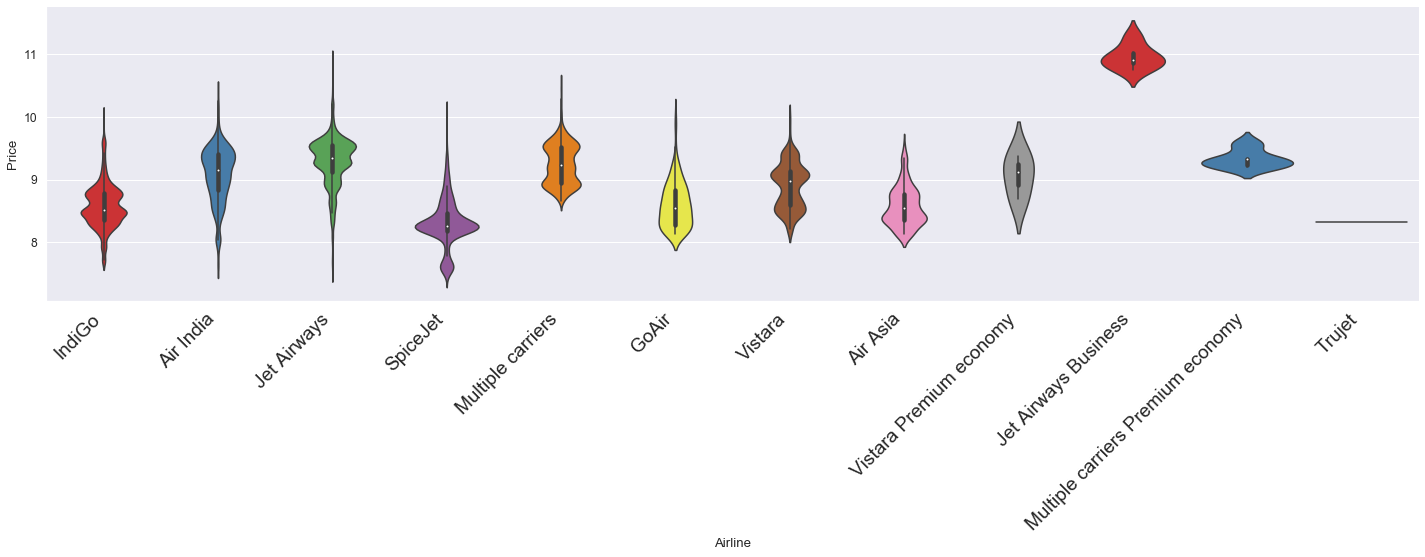

In [127]:
sns.set(font_scale=1.1)
sns.catplot(x='Airline',y='Price',kind='violin',data=data,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

From the above we can see that the second cheapest Indigo's ranges from 8 to 9, and spicejet has the cheapest flight fares.  

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

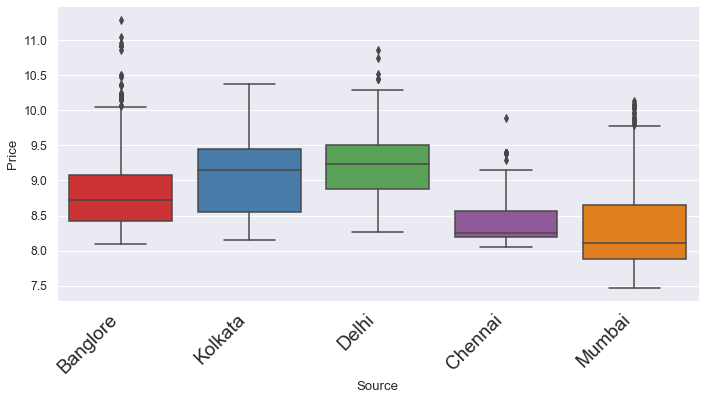

In [128]:
sns.set(font_scale=1.1)
sns.catplot(x='Source',y='Price',kind='box',data=data,aspect=2,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

From the above we can see that the price of most of the source are ranging from 8 to 9, however their are some outliers as due to rush booking.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

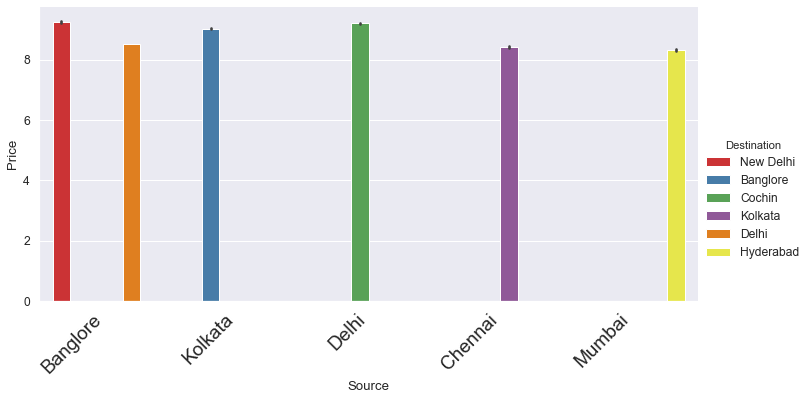

In [129]:
sns.set(font_scale=1.1)
sns.catplot(x='Source',y='Price',hue='Destination',kind='bar',data=data,aspect=2,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

From the above we can see that most of the destinations average price are more than 8, at this point we can't do much EDA as most of the features are categorical features.

## Lets do Feature Engineering.

In [130]:
data['Data']='Train'
dts['Data']='Test'
dts['Price']= 0

In [131]:
data1=pd.concat([data,dts])
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Data
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,8.267962,Train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,8.944028,Train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,9.538348,Train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,8.735204,Train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,9.495670,Train


In [132]:
data1['Date_of_journey']=data1['Date_of_Journey'].str.split('/').str[0]
data1['Month_of_journey']=data1['Date_of_Journey'].str.split('/').str[1]
data1['Year_of_journey']=data1['Date_of_Journey'].str.split('/').str[2]
data1['Arrival_Time']=data1['Arrival_Time'].str.split(' ').str[0]
data1['Arrival_Hour']=data1['Arrival_Time'].str.split(':').str[0]
data1['Arrival_Minute']=data1['Arrival_Time'].str.split(':').str[1]
data1['Dep_Hour']=data1['Dep_Time'].str.split(':').str[0]
data1['Dep_Minute']=data1['Dep_Time'].str.split(':').str[1]
data1['Duration_hour']=data1['Duration'].str.split('h').str[0]
data1['Duration']=data1['Duration'].str.split(' ').str[1]
data1['Duration_minute']=data1['Duration'].str.split('m').str[0]
data1['Duration_minute'].fillna('0',inplace=True)
data1.drop(['Arrival_Time'],axis=1,inplace=True)
data1.drop(['Dep_Time'],axis=1,inplace=True)
data1.drop(['Date_of_Journey'],axis=1,inplace=True)
data1.drop(['Duration'],axis=1,inplace=True)

In [133]:
data1['Duration_hour'].value_counts()

2     2967
1      785
3      627
5      608
7      600
9      551
12     538
8      531
13     516
11     467
10     459
6      442
14     424
15     339
23     331
26     292
16     286
4      278
22     273
24     240
21     237
25     231
27     222
20     203
18     179
19     168
17     161
28     116
29      76
30      61
38      41
37      22
33      21
32      12
36      11
35      10
34       9
31       8
39       3
42       2
47       2
5m       2
40       2
41       1
Name: Duration_hour, dtype: int64

In [134]:
#data[data['Duration_hour']=='5m']=0
def ext(data):
    if data=='5m':
        j='0'
    else:
        j=data
    return j

data1['Duration_hour']=data1['Duration_hour'].apply(lambda j:ext(j))

In [135]:
data1['Duration_hour'].value_counts()

2     2967
1      785
3      627
5      608
7      600
9      551
12     538
8      531
13     516
11     467
10     459
6      442
14     424
15     339
23     331
26     292
16     286
4      278
22     273
24     240
21     237
25     231
27     222
20     203
18     179
19     168
17     161
28     116
29      76
30      61
38      41
37      22
33      21
32      12
36      11
35      10
34       9
31       8
39       3
0        2
47       2
42       2
40       2
41       1
Name: Duration_hour, dtype: int64

In [136]:
data1['Duration_minute'].value_counts()

30    1818
0     1286
20    1260
50    1205
45    1154
35    1149
15    1135
55    1121
25    1009
40     803
5      767
10     647
Name: Duration_minute, dtype: int64

In [152]:
data1.isnull().sum()

Additional_Info     0
Airline             0
Data                0
Destination         0
Price               0
Source              0
Date_of_journey     0
Month_of_journey    0
Year_of_journey     0
Arrival_Hour        0
Arrival_Minute      0
Dep_Hour            0
Dep_Minute          0
Duration_hour       0
Duration_minute     0
Stop_1              0
Stop_2              0
Stop_3              0
Stop_4              0
Stop_5              0
Stop_6              0
Stops               0
dtype: int64

In [138]:
data1['Date_of_journey']=data1['Date_of_journey'].astype(int)
data1['Month_of_journey']=data1['Month_of_journey'].astype(int)
data1['Year_of_journey']=data1['Year_of_journey'].astype(int)
data1['Arrival_Hour']=data1['Arrival_Hour'].astype(int)
data1['Arrival_Minute']=data1['Arrival_Minute'].astype(int)
data1['Dep_Hour']=data1['Dep_Hour'].astype(int)
data1['Dep_Minute']=data1['Dep_Minute'].astype(int)
data1['Duration_hour']=data1['Duration_hour'].astype(int)
data1['Duration_minute']=data1['Duration_minute'].astype(int)

In [139]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 17 columns):
Additional_Info     13354 non-null object
Airline             13354 non-null object
Data                13354 non-null object
Destination         13354 non-null object
Price               13354 non-null float64
Route               13353 non-null object
Source              13354 non-null object
Total_Stops         13353 non-null object
Date_of_journey     13354 non-null int32
Month_of_journey    13354 non-null int32
Year_of_journey     13354 non-null int32
Arrival_Hour        13354 non-null int32
Arrival_Minute      13354 non-null int32
Dep_Hour            13354 non-null int32
Dep_Minute          13354 non-null int32
Duration_hour       13354 non-null int32
Duration_minute     13354 non-null int32
dtypes: float64(1), int32(9), object(7)
memory usage: 1.4+ MB


In [140]:
data1['Route'].value_counts()

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BLR → HBX → BOM → NAG → DEL       1
BOM → RPR → VTZ → HYD             1
BOM → DED → DEL → HYD             1
CCU → RPR → HYD → BLR             1
BOM → NDC → HYD                   1
Name: Route, Length: 132, dtype: int64

In [141]:
data1['Stop_1']=data1['Route'].str.split('→ ').str[0]
data1['Stop_2']=data1['Route'].str.split('→ ').str[1]
data1['Stop_3']=data1['Route'].str.split('→ ').str[2]
data1['Stop_4']=data1['Route'].str.split('→ ').str[3]
data1['Stop_5']=data1['Route'].str.split('→ ').str[4]
data1['Stop_6']=data1['Route'].str.split('→ ').str[5]
data1.drop(['Route'],axis=1, inplace=True)

In [142]:
data1['Stop_1'].fillna('None',inplace=True)
data1['Stop_2'].fillna('None',inplace=True)
data1['Stop_3'].fillna('None',inplace=True)
data1['Stop_4'].fillna('None',inplace=True)
data1['Stop_5'].fillna('None',inplace=True)
data1['Stop_6'].fillna('None',inplace=True)

In [143]:
data1['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [144]:
data1['Total_Stops'].replace(['non-stop'],['0 Direct'],inplace=True)

In [145]:
data1['Total_Stops'].value_counts()

1 stop      7056
0 Direct    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [146]:
data1['Stops']=data1['Total_Stops'].str.split(' ').str[0]

In [147]:
data1['Stops'].fillna('0',inplace=True)
data1.drop(['Total_Stops'],axis=1,inplace=True)

In [148]:
data1['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

In [150]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1['Stop_1']=le.fit_transform(data1['Stop_1'])
data1['Stop_2']=le.fit_transform(data1['Stop_2'])
data1['Stop_3']=le.fit_transform(data1['Stop_3'])
data1['Stop_4']=le.fit_transform(data1['Stop_4'])
data1['Stop_5']=le.fit_transform(data1['Stop_5'])
data1['Stop_6']=le.fit_transform(data1['Stop_6'])
data1['Source']=le.fit_transform(data1['Source'])
data1['Airline']=le.fit_transform(data1['Airline'])
data1['Additional_Info']=le.fit_transform(data1['Additional_Info'])
data1['Destination']=le.fit_transform(data1['Destination'])

In [153]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 22 columns):
Additional_Info     13354 non-null int32
Airline             13354 non-null int32
Data                13354 non-null object
Destination         13354 non-null int32
Price               13354 non-null float64
Source              13354 non-null int32
Date_of_journey     13354 non-null int32
Month_of_journey    13354 non-null int32
Year_of_journey     13354 non-null int32
Arrival_Hour        13354 non-null int32
Arrival_Minute      13354 non-null int32
Dep_Hour            13354 non-null int32
Dep_Minute          13354 non-null int32
Duration_hour       13354 non-null int32
Duration_minute     13354 non-null int32
Stop_1              13354 non-null int32
Stop_2              13354 non-null int32
Stop_3              13354 non-null int32
Stop_4              13354 non-null int32
Stop_5              13354 non-null int32
Stop_6              13354 non-null int32
Stops               13354 no

In [155]:
data1['Stops'].value_counts()

1    7056
0    4341
2    1899
3      56
4       2
Name: Stops, dtype: int64

In [157]:
data1['Stops']=data1['Stops'].astype(int)

In [158]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 22 columns):
Additional_Info     13354 non-null int32
Airline             13354 non-null int32
Data                13354 non-null object
Destination         13354 non-null int32
Price               13354 non-null float64
Source              13354 non-null int32
Date_of_journey     13354 non-null int32
Month_of_journey    13354 non-null int32
Year_of_journey     13354 non-null int32
Arrival_Hour        13354 non-null int32
Arrival_Minute      13354 non-null int32
Dep_Hour            13354 non-null int32
Dep_Minute          13354 non-null int32
Duration_hour       13354 non-null int32
Duration_minute     13354 non-null int32
Stop_1              13354 non-null int32
Stop_2              13354 non-null int32
Stop_3              13354 non-null int32
Stop_4              13354 non-null int32
Stop_5              13354 non-null int32
Stop_6              13354 non-null int32
Stops               13354 no

## Now Lets Split and scale our data

In [182]:
Trainfinal=data1.loc[data1['Data']=='Train']
Testfinal=data1.loc[data1['Data']=='Test']
Trainfinal.drop(['Data'],axis=1,inplace=True)
Testfinal.drop(['Data'],axis=1,inplace=True)

In [183]:
xtst=Testfinal.drop(['Price'],axis=True)

In [184]:
x=Trainfinal.drop(['Price'],axis=True)
x.head()

,Additional_Info,Airline,Destination,Source,Date_of_journey,Month_of_journey,Year_of_journey,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_hour,Duration_minute,Stop_1,Stop_2,Stop_3,Stop_4,Stop_5,Stop_6,Stops
0,8,3,5,0,24,3,2019,1,10,22,20,2,50,0,13,24,12,4,1,0
1,8,1,0,3,1,5,2019,13,15,5,50,7,25,2,25,1,3,4,1,2
2,8,4,1,2,9,6,2019,4,25,9,25,19,0,3,32,4,5,4,1,2
3,8,3,0,3,12,5,2019,23,30,18,5,5,25,2,34,3,12,4,1,1
4,8,3,5,0,1,3,2019,21,35,16,50,4,45,0,34,8,12,4,1,1


In [185]:
y=Trainfinal['Price']
y.head()

0    8.267962
1    8.944028
2    9.538348
3    8.735204
4    9.495670
Name: Price, dtype: float64

In [186]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x,xtst)

In [187]:
from sklearn.model_selection import train_test_split,cross_val_score

In [188]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=97)

In [189]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7478, 20), (3205, 20), (7478,), (3205,))

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [191]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
DTR=DecisionTreeRegressor(random_state=97)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=97)
RFR=RandomForestRegressor(random_state=97)
GBR=GradientBoostingRegressor(random_state=97)

In [192]:
models=[]
models.append(("LinearRegression",LR))
models.append(("Lasso",LA))
models.append(("Ridge",RI))
models.append(("DecisionTreeRegressor",DTR))
models.append(("AdaBoostRegressor",ABR))
models.append(("RandomForestRegressor",RFR))
models.append(("GradientBoostingRegressor",GBR))

In [193]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
RMSE=[]
for name,model in models:
    print('-------------------------------------',name,'-------------------------------')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pr=model.predict(x_test)
    r2=r2_score(y_test,pr)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pr)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    mae=mean_absolute_error(y_test,pr)
    print("Mean_Absolute_Error =",mae)
    MAE.append(mae)
    rmse=np.sqrt(mse)
    print("Root_Mean_Squared_Error =",rmse)
    RMSE.append(rmse)
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

------------------------------------- LinearRegression -------------------------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.6202164931994308
Mean_Squared_Error = 0.10088543206827416
Mean_Absolute_Error = 0.25453960337244996
Root_Mean_Squared_Error = 0.31762467169329617
Cross_Val_Score =  -35784970196154.89


------------------------------------- Lasso -------------------------------
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  -0.0004946397901461896
Mean_Squared_Error = 0.26577071465671653
Mean_Absolute_Error = 0.4305638509926106
Root_Mean_Squared_Error = 0.5155295478017885
Cross_Val_Score =  -0.0005635818888499733


------------------------------------- Ridge -------------------------------
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normali

In [194]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error' :MAE,'Root_Mean_Squared_Error' :RMSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Root_Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.620216,0.100885,0.254540,0.317625,-3.578497e+13
1,Lasso,-0.000495,0.265771,0.430564,0.515530,-5.635819e-04
2,Ridge,0.620212,0.100887,0.254542,0.317627,6.204766e-01
3,DecisionTreeRegressor,0.893380,0.028322,0.080843,0.168293,9.086534e-01
4,AdaBoostRegressor,0.723048,0.073569,0.221794,0.271237,6.813161e-01
5,RandomForestRegressor,0.927131,0.019357,0.075629,0.139129,9.361312e-01
6,GradientBoostingRegressor,0.872406,0.033894,0.133759,0.184103,8.723207e-01


From the above we can see that Random Forest Regressor is working as best giving us r2_score more than 90, so lets hypertune our model.

In [141]:
from sklearn.model_selection import GridSearchCV
RFRpara={
    "n_estimators"     :[10,30,50,80,100,150,200,250,300,350],
    "max_features"     :["auto","sqrt","log2"],
    "min_samples_split":[2,4,8,10,12],
    "bootstrap"        :[True,False],
    }
gFR=GridSearchCV(RFR,param_grid=RFRpara,n_jobs=1,cv=10)
gFR.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=97,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'bootstrap': [True, False],
           

In [142]:
gFR.best_score_ , gFR.best_params_

(0.9363096665976052,
 {'bootstrap': True,
  'max_features': 'auto',
  'min_samples_split': 2,
  'n_estimators': 350})

In [143]:
RFR=RandomForestRegressor(bootstrap = True,                       
 max_features= 'auto',
 min_samples_split= 2,
 n_estimators= 350)

print(cross_val_score(RFR,x,y,cv=10).mean())

0.9423040989425007


From the above we can see that after hypertunning ou model R2_score got increased from 92 to 93 and Cross val score has also increased from 93 to 94. So i choose RandomForest Regressor as our final model.

In [195]:
from sklearn.externals import joblib
joblib.dump(RFR,'Flight_Ticket_Price_Prediction.obj')

['Flight_Ticket_Price_Prediction.obj']

In [196]:
model=joblib.load('Flight_Ticket_Price_Prediction.obj')

In [198]:
model.predict(x_test)

array([8.53696478, 7.96651982, 8.88585599, ..., 9.02844111, 9.38775831,
       9.00072872])

In [200]:
prediction=model.predict(xtst)

In [201]:
pre = pd.DataFrame(prediction)
pre.columns = ["prediction"]
pre.to_csv("Flight_Ticket_Price_Prediction_results.csv")